In [78]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import kstest
from scipy.stats import skew

import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,10) 
pd.options.display.max_columns = None

##### <font color=green> En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


In [79]:
df = pd.read_pickle("datos/cars_price3.pkl")
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_log
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,9.497622
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,9.718422


Chequeamos de nuevo los nulos:

In [80]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Color               0
Airbags             0
Price_log           0
dtype: int64

In [81]:
df.shape

(13584, 16)

##### <font color=green> En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
##### <font color=green> Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


### <font color=violet> Manualmente:

In [82]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_log
0,13328,1399.0,2010,186005.0,6.0,12,9.497622
1,16621,1018.0,2011,192000.0,6.0,8,9.718422
2,8467,0.0,2006,200000.0,4.0,2,9.043932
3,3607,862.0,2011,168966.0,4.0,0,8.190632
4,11726,446.0,2014,91901.0,4.0,4,9.369564


In [83]:
numericas.columns

Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Price_log'],
      dtype='object')

In [84]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,13584.0,20756.667329,19024.644961,500.000000,9885.75000,16308.000000,25089.000000,3.089060e+05
Levy,13584.0,581.027664,462.942608,0.000000,0.00000,640.000000,880.000000,2.151000e+03
Prod. year,13584.0,2011.728578,4.203401,2001.000000,2010.00000,2012.000000,2015.000000,2.020000e+03
Mileage,13584.0,146846.679142,165138.041881,0.000000,68000.00000,119386.500000,173101.250000,1.019978e+06
Cylinders,13584.0,4.460247,1.119606,1.000000,4.00000,4.000000,4.000000,1.600000e+01
Airbags,13584.0,6.733657,3.961573,0.000000,4.00000,6.000000,12.000000,1.600000e+01
Price_log,13584.0,9.567687,0.982023,6.214608,9.19885,9.699411,10.130185,1.264079e+01


In [85]:
media = numericas["Levy"].mean()
desviacion = numericas["Levy"].std() 

In [86]:
numericas["Levy_esta"] = (numericas["Levy"] - media) / desviacion
numericas.head(2)

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_log,Levy_esta
0,13328,1399.0,2010,186005.0,6.0,12,9.497622,1.766898
1,16621,1018.0,2011,192000.0,6.0,8,9.718422,0.943902


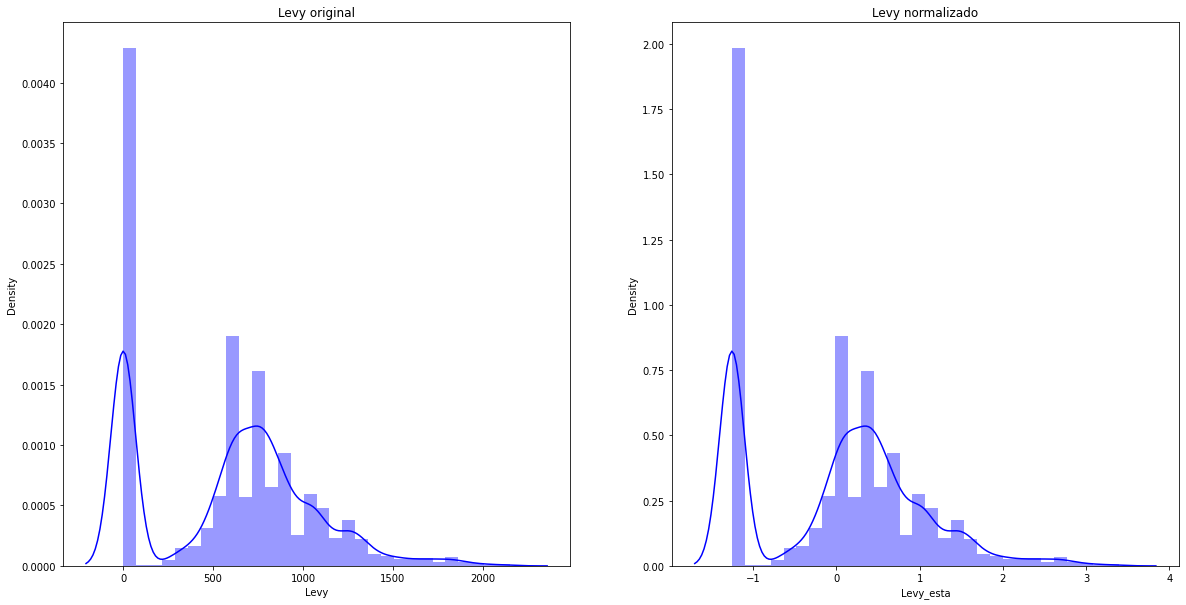

In [87]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Levy original')
axes[1].set_title('Levy normalizado')

sns.distplot(numericas['Levy'], color = 'blue', ax = axes[0])
sns.distplot(numericas['Levy_esta'], color = 'blue', ax = axes[1]);

Chequeemos que la media de los datos sea igual a 0 y la desviación igual a 1:

In [88]:
print(f'La media de la columna Levy_esta es:  {np.round(numericas["Levy_esta"].mean(),1)}')
print(f'La desviación estándar de la columna Levy_esta es: {np.round(numericas["Levy_esta"].std(),1)}')

La media de la columna Levy_esta es:  0.0
La desviación estándar de la columna Levy_esta es: 1.0


### <font color=violet> Sklearn StandardScaler

In [89]:
numericas.head(2)

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_log,Levy_esta
0,13328,1399.0,2010,186005.0,6.0,12,9.497622,1.766898
1,16621,1018.0,2011,192000.0,6.0,8,9.718422,0.943902


La estandarización solo se hace para las variables predictoras. Por lo tanto, lo primero que tenemos que hacer es quitar de nuestro dataframe de "numericas" las columnas de la variable respuesta, es decir, Price, Price_log y Levy_esta.

In [90]:
numericas.drop(["Price", 'Price_log', 'Levy_esta'], axis = 1, inplace = True)
numericas.head(2)

,Levy,Prod. year,Mileage,Cylinders,Airbags
0,1399.0,2010,186005.0,6.0,12
1,1018.0,2011,192000.0,6.0,8


In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(numericas)

StandardScaler()

In [93]:
X_escaladas = scaler.transform(numericas)
X_escaladas

array([[ 1.76696297, -0.41124831,  0.2371335 ,  1.37531341,  1.32940559],
       [ 0.94393649, -0.17333693,  0.2734378 ,  1.37531341,  0.31966836],
       [-1.25512113, -1.36289383,  0.3218839 , -0.41109483, -1.19493749],
       ...,
       [-1.25512113, -2.07662796,  0.44299916,  1.37531341, -1.6998061 ],
       [ 0.53998386, -0.17333693,  0.08934261, -0.41109483,  0.31966836],
       [ 0.55078473, -0.41124831, -0.18458982, -0.41109483, -0.69006887]])

In [94]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,Levy,Prod. year,Mileage,Cylinders,Airbags
0,1.766963,-0.411248,0.237134,1.375313,1.329406
1,0.943936,-0.173337,0.273438,1.375313,0.319668


Sacamos los valores de media y desviación estándar para las columnas numéricas estandarizadas

In [95]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Levy es:  6.276879291166963e-17
La desviación estándar de la columna Levy es: 1.0000368100417918
-------------------------------------------------------------
La media de la columna Prod. year es:  -5.361501061205114e-15
La desviación estándar de la columna Prod. year es: 1.0000368100417918
-------------------------------------------------------------
La media de la columna Mileage es:  2.7199810261723504e-17
La desviación estándar de la columna Mileage es: 1.000036810041792
-------------------------------------------------------------
La media de la columna Cylinders es:  2.9919791287895856e-16
La desviación estándar de la columna Cylinders es: 1.000036810041792
-------------------------------------------------------------
La media de la columna Airbags es:  1.883063787350089e-17
La desviación estándar de la columna Airbags es: 1.000036810041792
-------------------------------------------------------------


Vamos a comprobar visualmente que todas nuestras columnas están en las mismas unidades.

In [96]:
numericas_estandar.head(2)

,Levy,Prod. year,Mileage,Cylinders,Airbags
0,1.766963,-0.411248,0.237134,1.375313,1.329406
1,0.943936,-0.173337,0.273438,1.375313,0.319668


In [97]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
Levy,13584.0,6.276879e-17,1.000037,-1.255121,-1.255121,0.127391,0.645832,3.391414
Prod. year,13584.0,-5.361501e-15,1.000037,-2.552451,-0.411248,0.064574,0.778309,1.967865
Mileage,13584.0,2.719981e-17,1.000037,-0.889269,-0.477477,-0.166292,0.158991,5.287479
Cylinders,13584.0,2.991979e-16,1.000037,-3.090707,-0.411095,-0.411095,-0.411095,10.307355
Airbags,13584.0,1.883064e-17,1.000037,-1.699806,-0.690069,-0.185200,1.329406,2.339143


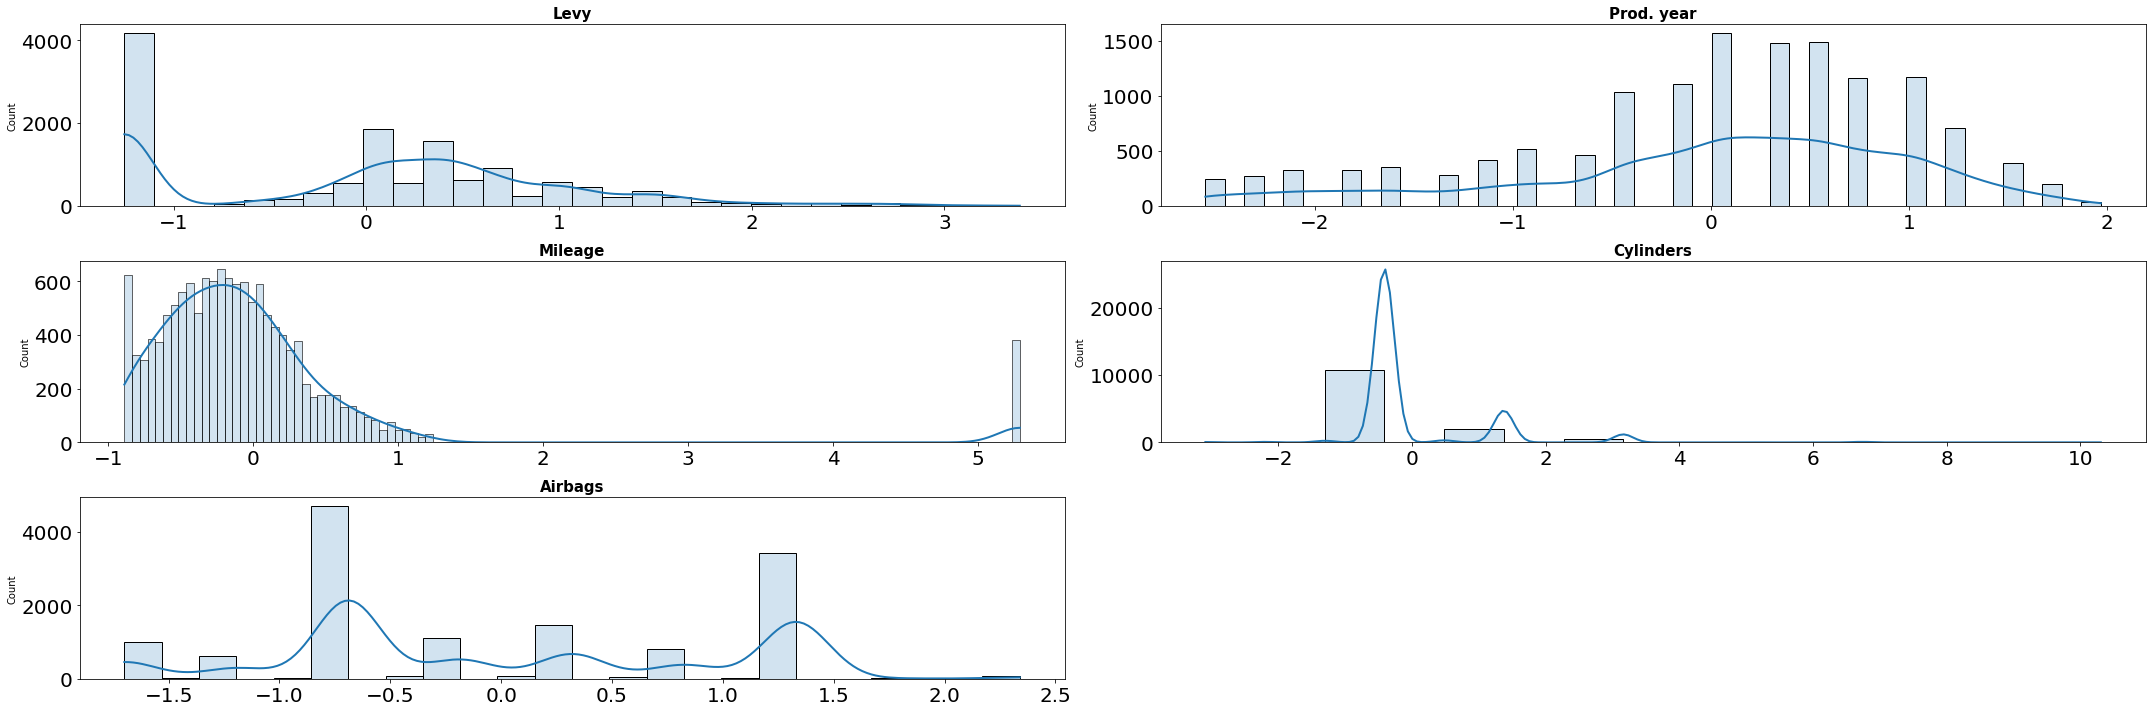

In [98]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.axes[-1].remove()
fig.tight_layout(); 


Vemos que todas nuestras variables están en la misma escala.

### <font color=violet> Sklearn RobustScaler

In [99]:
robust = RobustScaler()

In [100]:
robust.fit(numericas)

RobustScaler()

In [101]:
X_robust = robust.transform(numericas)

In [102]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,Levy,Prod. year,Mileage,Cylinders,Airbags
0,0.862500,-0.4,0.633851,2.0,0.75
1,0.429545,-0.2,0.690891,2.0,0.25


In [103]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Levy es:  -0.06701401819176905
La desviación estándar de la columna Levy es: 0.5260711459824201
-------------------------------------------------------------
La media de la columna Prod. year es:  -0.054284452296819795
La desviación estándar de la columna Prod. year es: 0.8406801026756252
-------------------------------------------------------------
La media de la columna Mileage es:  0.2612735732604944
La desviación estándar de la columna Mileage es: 1.5712281431584616
-------------------------------------------------------------
La media de la columna Cylinders es:  0.46024734982332155
La desviación estándar de la columna Cylinders es: 1.1196061339071104
-------------------------------------------------------------
La media de la columna Airbags es:  0.0917071554770318
La desviación estándar de la columna Airbags es: 0.49519656264179396
-------------------------------------------------------------


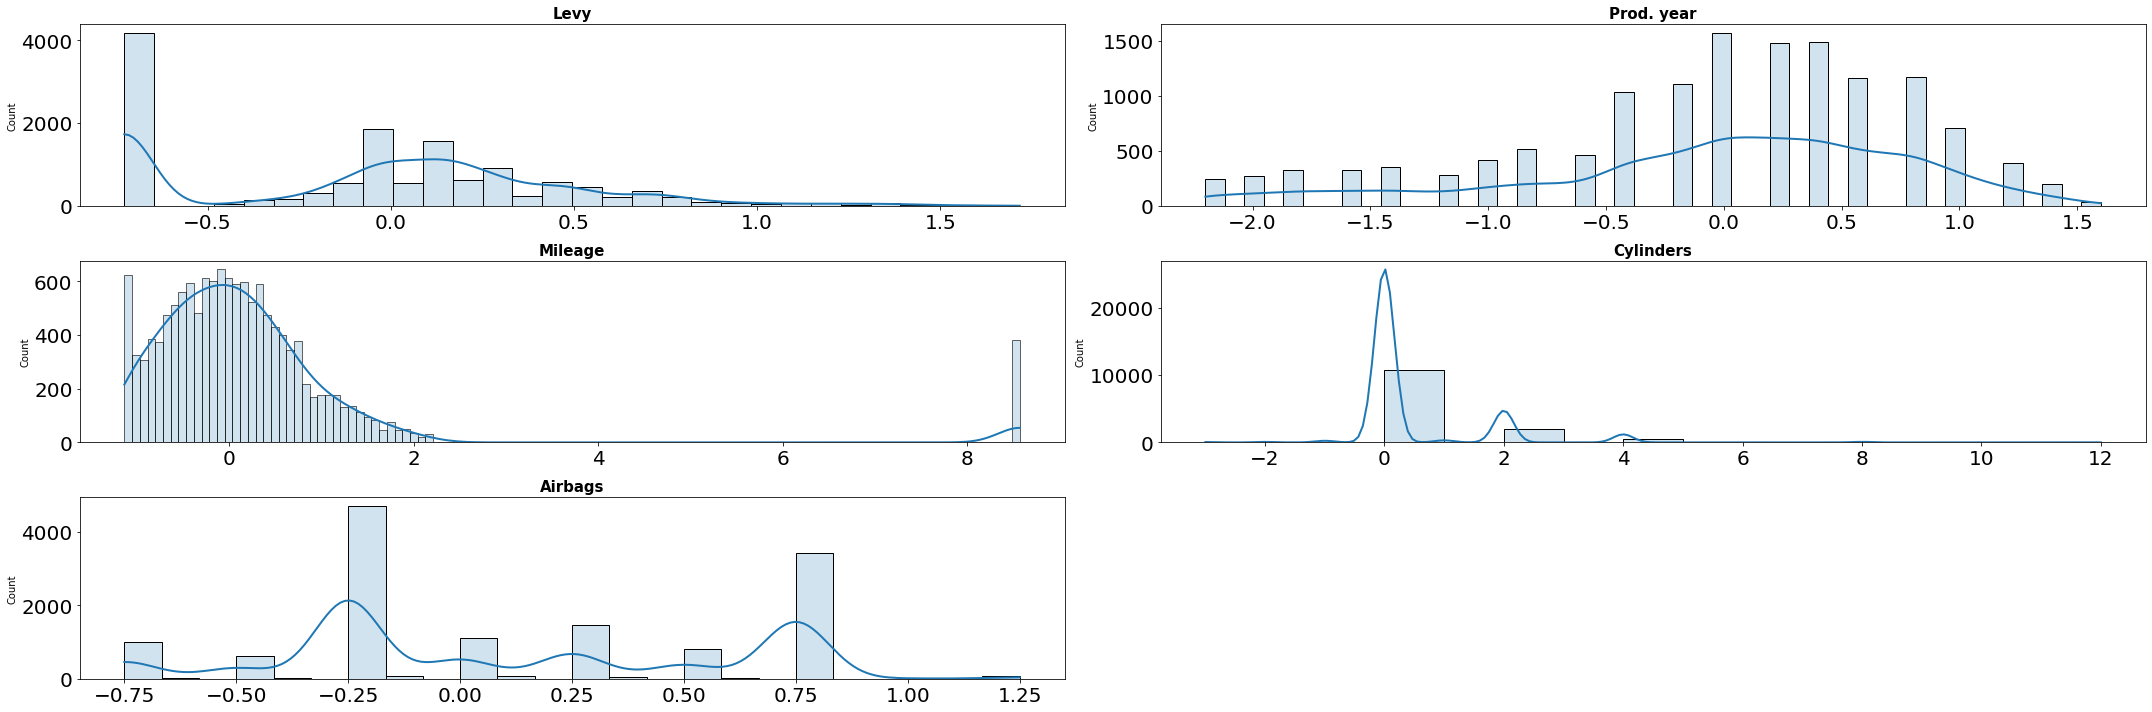

In [104]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.axes[-1].remove()
fig.tight_layout(); 

In [105]:
df[numericas_estandar.columns] = numericas_estandar
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_log
0,13328,1.766963,LEXUS,-0.411248,Jeep,Yes,Hybrid,3.5,0.237134,1.375313,Automatic,4x4,04,Silver,1.329406,9.497622
1,16621,0.943936,CHEVROLET,-0.173337,Jeep,No,Petrol,3,0.273438,1.375313,Tiptronic,4x4,04,Black,0.319668,9.718422
2,8467,-1.255121,HONDA,-1.362894,Hatchback,No,Petrol,1.3,0.321884,-0.411095,Variator,Front,04,Black,-1.194937,9.043932
3,3607,0.606949,FORD,-0.173337,Jeep,Yes,Hybrid,2.5,0.133949,-0.411095,Automatic,4x4,04,White,-1.699806,8.190632
4,11726,-0.291683,HONDA,0.540397,Hatchback,Yes,Petrol,1.3,-0.332738,-0.411095,Automatic,Front,04,Silver,-0.690069,9.369564


Eliminamos la columna de Price porque ya tenemos Price_log

In [106]:
df.drop("Price", axis = 1, inplace = True)

In [107]:
df.columns

Index(['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Color', 'Airbags', 'Price_log'],
      dtype='object')

Chequeamos de nuevo los nulos:

In [108]:
df.isnull().sum()

Levy                3707
Manufacturer           0
Prod. year          3707
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage             3707
Cylinders           3707
Gear box type          0
Drive wheels           0
Doors                  0
Color                  0
Airbags             3707
Price_log              0
dtype: int64

procedemos a eliminar los nulos:

In [109]:
df = df.dropna(how = "any")

In [110]:
df.isnull().sum()

Levy                0
Manufacturer        0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Color               0
Airbags             0
Price_log           0
dtype: int64

##### <font color=green> Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [111]:
df.to_pickle('datos/cars_price_norm_est.pkl')

In [112]:
df.to_csv('datos/cars_price_norm_est.csv')